# Data Challenge Project: Fraud Detection  

<img src="https://github.com/er1czz/kaggle/blob/master/unsplash_transaction.JPG?raw=true" align = "right" style = "border:20px solid white">   

<h3> Situation:</h3>  

 * Credit card fraud is a common financial fraud, especially during pandemic. 
 * Shopping everything online is the new norm. 
 
<h3> Task:</h3> 
 
 * How to maximaize the transaction security with minimal hassles to clients?  

<h3> Action:</h3>

* Develop a predicative model based on machine learning algorithms of binary classification.  

<h3> Results:</h3> 

* To maximize the detection rate of fradulent activities while minimizing the number of false alarms (false positive events).    

<b>The project consists of five sections as follows:</b>
1. Data exploration
2. Data cleaning
3. Feature selection
4. Models training and testing
5. Takeaway

<b>Data Wrangling Summary</b>
<p>&nbsp;&nbsp; This project aimed to tackle the data challenge in fraud detection. The original data contain information of transaction and identification. Notably, the data are heavily skewed: 96.5% of transactions is non-fradulent. In addition, the dataset contain missing values and categorical features. To overcome these challenges, undersampling was performed to balance the data; features with missing data were either discarded or replaced by means; all the non-numberical features were systematically transformed into numberical by encoder. To validate model predictivity, original dataset was randomlly splited into two groups: 80% for training and 20% for testing. 

In [1]:
cd ../../../../Desktop/Fraud2/

C:\Users\EzzZ\Desktop\Fraud2


In [2]:
import pandas as pd

In [3]:
# Data, provided by Kaggle.com, contain two datasets: identity and transaction.  

id = pd.read_csv('train_identity.csv')
tn = pd.read_csv('train_transaction.csv')

## 1. Data exploration

In [4]:
print(id.shape)
print(tn.shape)

(144233, 41)
(590540, 394)


In [5]:
id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
tn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
tn.TransactionID.sum()

1938311430530

In [8]:
id.TransactionID.sum()

466785485555

Feature "TransactionDT" is timedelta from a given reference datetime (not an actual timestamp).

In [9]:
tn.isnull().sum().max()

552913

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 1.1. Remove unpaired transaction (mismatch between identity and transaction datasets)

In [11]:
data = tn.merge(id, on= 'TransactionID', copy = False)

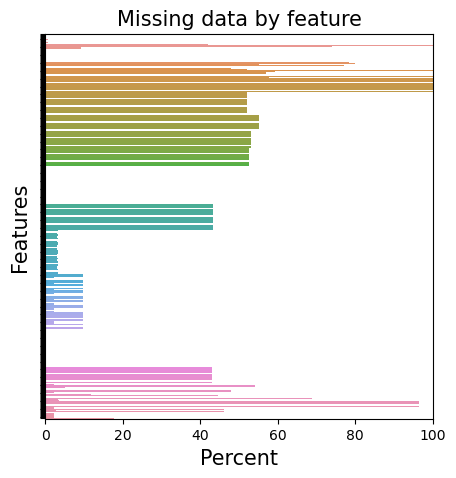

In [12]:
plt.style.use('default')
total=data.isnull().sum()
percent=data.isnull().sum()/data.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])

plt.subplots(figsize=(5, 5))
g = sns.barplot(y=missing_data.index,x=missing_data['percent'])
g.set(yticklabels=[])

plt.xlim(0, 100)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent', fontsize=15)
plt.title('Missing data by feature', fontsize=15)
plt.show()

In [13]:
print('id rows   %.f' %len(id))
print('tn rows   %.f'   %len(tn))
print('data rows %.f' %len(data))

id rows   144233
tn rows   590540
data rows 144233


In [14]:
tmp = id.size + tn.size - data.size - len(data)
percent = tmp/(id.size + tn.size)*100
print('unmatched data entry %.f' % tmp)
print('unmatched data       %.2f%%\n' % percent)

missing = data.isnull().sum().sum()
total = data.size
percent1 = missing/total*100
print('Missing data entry %.f' % missing)
print('Total data entry   %.f' % total)
print('Missing data:      %.2f%%\n' % percent)

tmp1 = data.isnull().any(axis = 0).sum()
print('Columns with missing values %.f' %tmp1)
print('total columns               %.f' %len(data.columns))

tmp2 = data.isnull().any(axis = 1).sum()
print('Rows with missing values %.f' %tmp2)
print('total rows               %.f' %len(data))

unmatched data entry 175844958
unmatched data       73.70%

Missing data entry 16834880
Total data entry   62597122
Missing data:      73.70%

Columns with missing values 412
total columns               434
Rows with missing values 144233
total rows               144233


# 2. Data cleaning

### Treating missing value is tricky for data pre-processing. 
- Each row has missing value. A few columns have more than 50% data of missing values. Total missing data in percentage is 26.9%.
- Features with over 90% data of missing values will be discarded. For the rest, the missing values will be replaced with mean.
- Considering the potential data leakage, the data jettison will be performed first, splitting data second, and replacing missing values last.

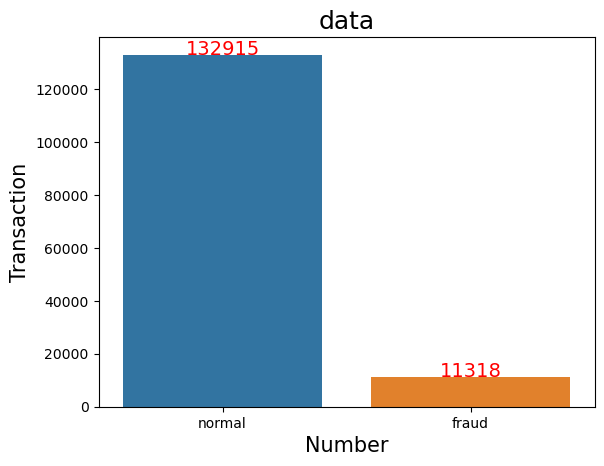

In [15]:
import numpy as np
sns.countplot(x='isFraud',data=data)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('data',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (data['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

### 2.1. Remove columns with over 90% data missing 

In [16]:
data_1 = data.dropna(axis=1, thresh=len(data)*0.1)

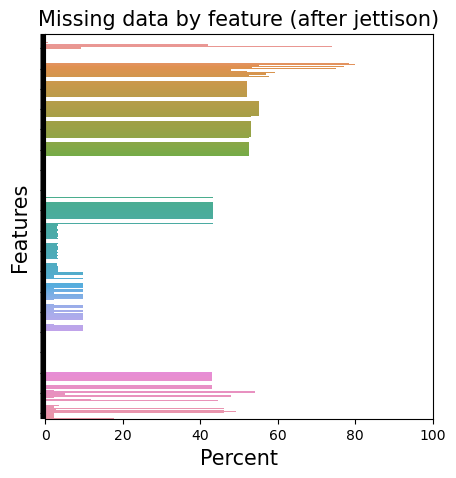

In [17]:
plt.style.use('default')
total1=data_1.isnull().sum()
percent1=data_1.isnull().sum()/data_1.isnull().count()*100
missing_data1=pd.concat([total1,percent1],axis=1, keys=['total', 'percent'])

plt.subplots(figsize=(5, 5))
g = sns.barplot(y=missing_data1.index,x=missing_data1['percent'])
g.set(yticklabels=[])

plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent', fontsize=15)
plt.xlim(0, 100)
plt.title('Missing data by feature (after jettison)', fontsize=15)
plt.show()

In [18]:
tmp = data_1.size/data.size*100
print('Data preserved: %.2f%%\n' % tmp)

Data preserved: 93.09%



### 2.2. Splitting data: 80% for training and 20% for testing

In [19]:
X = data_1.drop('isFraud', axis=1)
y = data_1['isFraud'].copy()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [21]:
tmp = y_test.sum(axis=0)/y.sum(axis=0)*100
print('Testing data: %.1f%%\n' % tmp)

Testing data: 20.5%



In [22]:
y_train.head()

122872    0
54800     0
109241    1
5569      0
1874      0
Name: isFraud, dtype: int64

##### Manually split the dataset for the convenience of data wrangling

In [23]:
normal = data_1[data_1['isFraud'] == 0]
fraud = data_1[data_1['isFraud'] == 1]
# shuffle
normal_r = normal.sample(frac=1)
fraud_r = fraud.sample(frac=1)
# 80% for training and 20% for testing.
normal_1 = normal_r[:106332]
normal_2 = normal_r[106333:]
fraud_1 = fraud_r[:9054]
fraud_2 = fraud_r[9055:]
train = pd.concat([normal_1, fraud_1])
test = pd.concat([normal_2, fraud_2])

### Double check the data features

In [24]:
print(train.shape)
print(test.shape)

(115386, 404)
(28845, 404)


In [25]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
90098,3292580,0,7589513,13.534,C,1976,545.0,185.0,visa,102.0,...,chrome 64.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,BLL-L23 Build/HUAWEIBLL-L23
36067,3077163,0,1885634,53.986,C,1976,545.0,185.0,visa,102.0,...,mobile safari 11.0,NaN,NaN,NaN,F,F,F,T,mobile,NaN
18371,3041583,0,1278552,100.000,H,5955,414.0,143.0,visa,147.0,...,ie 11.0 for desktop,24.0,1280x1024,match_status:2,T,T,T,T,desktop,Trident/7.0
56618,3116004,0,2568946,82.553,C,12377,555.0,213.0,mastercard,166.0,...,chrome 63.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,SM-T705
131986,3522854,0,14125633,47.340,C,3154,408.0,185.0,mastercard,224.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G531H Build/LMY48B


In [26]:
train[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
90098,visa,chrome 64.0 for android,mobile,BLL-L23 Build/HUAWEIBLL-L23
36067,visa,mobile safari 11.0,mobile,NaN
18371,visa,ie 11.0 for desktop,desktop,Trident/7.0
56618,mastercard,chrome 63.0 for android,mobile,SM-T705
131986,mastercard,chrome 66.0 for android,mobile,SM-G531H Build/LMY48B
...,...,...,...,...
121977,visa,chrome 65.0,desktop,Windows
2816,mastercard,chrome 56.0 for android,mobile,5011A Build/NRD90M
75283,visa,chrome 63.0 for android,mobile,HUAWEI VNS-L23 Build/HUAWEIVNS-L23
76346,visa,chrome 63.0,desktop,Windows


### 2.3. Replacing missing value with mean

In [27]:
train_m = train.fillna(train.mean())

In [28]:
train_m.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
90098,3292580,0,7589513,13.534,C,1976,545.0,185.0,visa,102.0,...,chrome 64.0 for android,26.501927,NaN,NaN,F,F,T,F,mobile,BLL-L23 Build/HUAWEIBLL-L23
36067,3077163,0,1885634,53.986,C,1976,545.0,185.0,visa,102.0,...,mobile safari 11.0,26.501927,NaN,NaN,F,F,F,T,mobile,NaN
18371,3041583,0,1278552,100.000,H,5955,414.0,143.0,visa,147.0,...,ie 11.0 for desktop,24.000000,1280x1024,match_status:2,T,T,T,T,desktop,Trident/7.0
56618,3116004,0,2568946,82.553,C,12377,555.0,213.0,mastercard,166.0,...,chrome 63.0 for android,26.501927,NaN,NaN,F,F,T,T,mobile,SM-T705
131986,3522854,0,14125633,47.340,C,3154,408.0,185.0,mastercard,224.0,...,chrome 66.0 for android,26.501927,NaN,NaN,F,F,T,F,mobile,SM-G531H Build/LMY48B


In [29]:
test_m = test.fillna(test.mean())

## 3. Feature Selection

### 3.1. Use encoder: non-numerical value --- > numberical value

In [30]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [31]:
for f in train_m.columns:
    if train_m[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(train_m[f].values))
        train_m[f] = le.transform(list(train_m[f].values))

In [32]:
train_m[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
90098,4,49,1,153
36067,4,95,1,1649
18371,4,88,0,1468
56618,2,46,1,1405
131986,2,55,1,1135
...,...,...,...,...
121977,4,51,0,1512
2816,2,31,1,16
75283,4,46,1,392
76346,4,45,0,1512


In [33]:
test[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
131234,visa,mobile safari 11.0,mobile,iOS Device
124282,visa,chrome 65.0,desktop,Windows
34329,mastercard,ie 11.0 for tablet,desktop,Trident/7.0
120439,american express,chrome 65.0,desktop,Windows
123520,visa,chrome 65.0,desktop,Windows
...,...,...,...,...
69502,visa,chrome 63.0,desktop,Windows
100367,visa,chrome generic,desktop,Windows
106627,visa,chrome 65.0 for android,mobile,Moto G Play Build/MPIS24.241-15.3-7
76668,mastercard,mobile safari generic,mobile,iOS Device


In [34]:
for f in test_m.columns:
    if test_m[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(test_m[f].values))
        test_m[f] = le.transform(list(test_m[f].values))

In [35]:
test_m[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
131234,4,87,1,1069
124282,4,47,0,988
34329,2,82,0,961
120439,0,47,0,988
123520,4,47,0,988
...,...,...,...,...
69502,4,41,0,988
100367,4,55,0,988
106627,4,48,1,460
76668,2,90,1,1069


### 3.2. Correlation

In [36]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
90098,3292580,0,7589513,13.534,C,1976,545.0,185.0,visa,102.0,...,chrome 64.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,BLL-L23 Build/HUAWEIBLL-L23
36067,3077163,0,1885634,53.986,C,1976,545.0,185.0,visa,102.0,...,mobile safari 11.0,NaN,NaN,NaN,F,F,F,T,mobile,NaN
18371,3041583,0,1278552,100.000,H,5955,414.0,143.0,visa,147.0,...,ie 11.0 for desktop,24.0,1280x1024,match_status:2,T,T,T,T,desktop,Trident/7.0
56618,3116004,0,2568946,82.553,C,12377,555.0,213.0,mastercard,166.0,...,chrome 63.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,SM-T705
131986,3522854,0,14125633,47.340,C,3154,408.0,185.0,mastercard,224.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G531H Build/LMY48B


In [37]:
train_c = train.set_index('TransactionID')

In [38]:
print(train_c.shape)

(115386, 403)


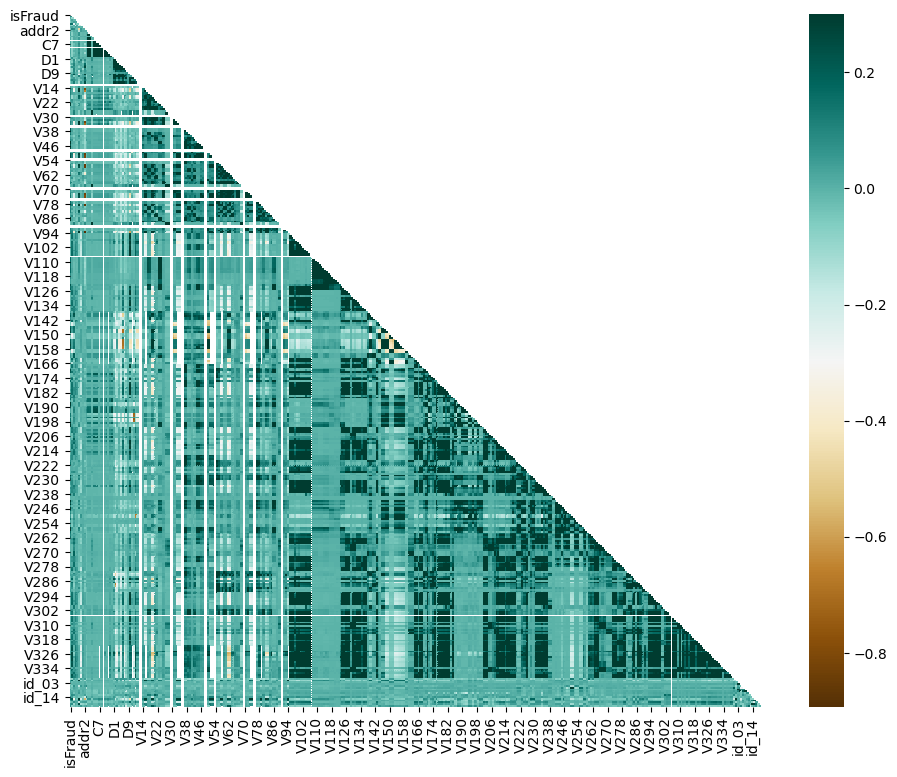

In [153]:
correlation_matrix = train_c.corr()
plt.figure(figsize=(12,9))
matrix = np.triu(train_c.corr())
sns.heatmap(correlation_matrix, mask = matrix, vmax=.3, square=True, cmap= 'BrBG')

- There is no feature exhibiting noticeable correlation with "isFraud".  
- Feature category C, D, and V series show noticeable intercorrelations.

### 3.3. Feature Importance (Random Forest)

In [39]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
X = train.drop('isFraud', axis=1)
y = train['isFraud'].copy()

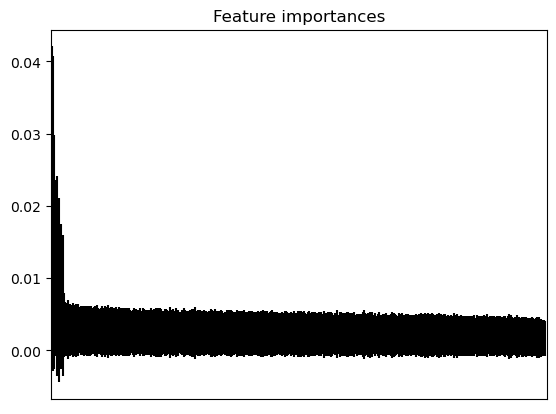

In [41]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=404, n_informative=5, n_redundant=5, random_state=13)
# define the model
forest = ExtraTreesClassifier(n_estimators=250, random_state=13)
# fit the model
forest.fit(X, y)
# get importance
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks([])
plt.xlim([-1, X.shape[1]])
plt.show()

In [42]:
feature = [ ]
# summarize feature importance
for i,v in enumerate(importances):
    if v >= 0.00215:
        print('Feature: %0d, Score: %.5f' % (i,v))
        feature.append(i)

Feature: 0, Score: 0.00219
Feature: 2, Score: 0.00241
Feature: 4, Score: 0.00235
Feature: 5, Score: 0.00233
Feature: 7, Score: 0.00218
Feature: 10, Score: 0.00268
Feature: 11, Score: 0.00259
Feature: 12, Score: 0.00248
Feature: 14, Score: 0.00227
Feature: 15, Score: 0.00264
Feature: 16, Score: 0.00229
Feature: 18, Score: 0.00227
Feature: 19, Score: 0.00227
Feature: 22, Score: 0.00233
Feature: 23, Score: 0.00242
Feature: 24, Score: 0.00226
Feature: 25, Score: 0.00262
Feature: 27, Score: 0.00216
Feature: 31, Score: 0.00233
Feature: 33, Score: 0.00252
Feature: 34, Score: 0.00240
Feature: 35, Score: 0.00269
Feature: 36, Score: 0.00229
Feature: 37, Score: 0.00257
Feature: 38, Score: 0.00226
Feature: 40, Score: 0.00243
Feature: 41, Score: 0.00228
Feature: 42, Score: 0.00236
Feature: 44, Score: 0.00259
Feature: 45, Score: 0.00233
Feature: 46, Score: 0.00216
Feature: 48, Score: 0.00218
Feature: 49, Score: 0.00228
Feature: 50, Score: 0.00255
Feature: 51, Score: 0.00257
Feature: 52, Score: 0.002

In [43]:
len(feature)

260

In [44]:
print(feature)

[0, 2, 4, 5, 7, 10, 11, 12, 14, 15, 16, 18, 19, 22, 23, 24, 25, 27, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 65, 70, 71, 73, 74, 75, 77, 82, 83, 84, 85, 86, 87, 90, 91, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 132, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148, 150, 151, 152, 154, 156, 157, 159, 160, 165, 167, 170, 173, 175, 176, 178, 179, 181, 182, 183, 185, 190, 192, 193, 194, 197, 198, 199, 200, 204, 205, 206, 208, 209, 210, 212, 213, 215, 216, 219, 221, 222, 223, 224, 225, 226, 227, 228, 230, 231, 233, 234, 235, 236, 237, 238, 240, 241, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 258, 259, 260, 262, 263, 264, 265, 267, 268, 269, 270, 272, 275, 277, 279, 284, 286, 287, 288, 290, 294, 295, 296, 297, 298, 301, 303, 305, 306, 307, 309, 310, 311, 312, 313, 314, 317, 318, 321, 322, 323, 327, 328, 330, 

### 3.3. Data balancing (undersample)

#### The training dataset is highly skewed. 
- The fraction of fradulent transactions is a minority, compared to that of normal ones. 
- Thus, accurate correlations between the fraudulent transactions and their corresponding features can be challenging. 
- To overcome this issue, undersampling the majority (normal) is performed which can help to balance the dataset and to improve the computation efficiency.

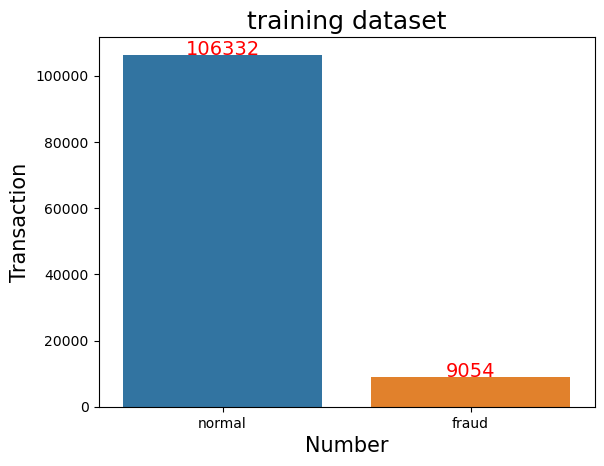

In [45]:
sns.countplot(x='isFraud',data=train_m)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training dataset',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train_m['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

In [46]:
normal_m = train_m[train_m['isFraud'] == 0]
fraud_m = train_m[train_m['isFraud'] == 1]

normal_mr = normal_m.sample(frac=1) 
normal_u = normal_mr[:9054]
train_u = pd.concat([normal_u, fraud_m])

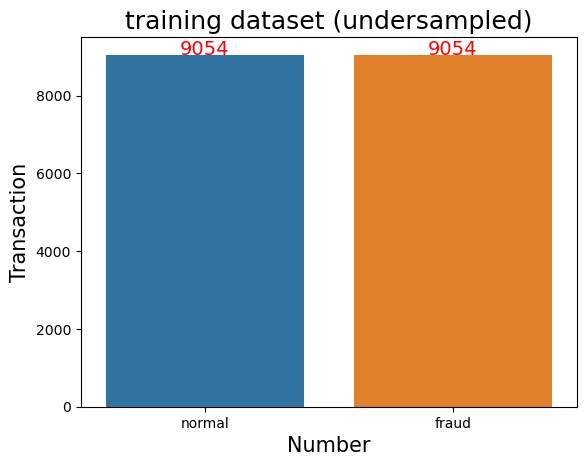

In [47]:
sns.countplot(x='isFraud',data=train_u)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training dataset (undersampled)',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train_u['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

## 4. Model training and testing

In [48]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [49]:
X_train = train_u.iloc[:,feature]
y_train = train_u['isFraud'].copy()
X_test = test_m.iloc[:,feature]
y_test = test_m['isFraud'].copy()

In [50]:
# normalize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [51]:
# Logistic
LR = LogisticRegression(random_state=13,n_jobs=8)
LR.fit(X_train_std, y_train)
LR_pred = LR.predict(X_test_std)

In [52]:
# XGBoost
XG = xgb.XGBClassifier(n_estimators=500, max_depth=5,random_state=13,n_jobs=8)
XG.fit(X_train_std, y_train)
XG_pred = XG.predict(X_test_std)

In [53]:
# Random Forest
RF = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=13, n_jobs=8)
RF.fit(X_train_std, y_train)
RF_pred = RF.predict(X_test_std)

In [54]:
# LightGBM
LG = lgb.LGBMClassifier(n_estimator=500, max_depth=5, random_state = 13, n_jobs=8)
LG.fit(X_train_std, y_train)
LG_pred = LG.predict(X_test_std)

#### F<sub>1</sub> score

In [55]:
score1 = metrics.f1_score(y_test, LR_pred)
score2 = metrics.f1_score(y_test, XG_pred)
score3 = metrics.f1_score(y_test, RF_pred)
score4 = metrics.f1_score(y_test, LG_pred)
print ('F1 score Logistic:     %.5f' % score1 )
print ('F1 score XGboost:      %.5f' % score2 )
print ('F1 score RandomForest: %.5f' % score3 )
print ('F1 score LightGBM:     %.5f' % score4 )

F1 score Logistic:     0.35763
F1 score XGboost:      0.68026
F1 score RandomForest: 0.48182
F1 score LightGBM:     0.60364


#### Data normalization significantly improved the performance of logistic model with increased F<sub>1</sub>score from 0.2 to 0.4. LightGBM received slight improvement.

### 4.1. Model optimization

In [56]:
from sklearn.model_selection import GridSearchCV

#### Grid search to tune the hyperparameters of Logistic Regression, Random Forest, and XGBoost.
#### For logistic regression, <em>C</em> is a regularization parameter.  <em>C = 1 / λ</em>. 

In [57]:
# To optimize Logistic
c_values = list(np.logspace(-5,5,11, endpoint=True)) #convert the array into list
solvers = ['newton-cg', 'saga']
penalty = ['l2']

In [58]:
#define grid search
grid = dict(solver=solvers, penalty=penalty,C=c_values)
#cv = StratifiedKFold(n_splits=10, random_state=13)  #Kfold for cross-validation
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=8, cv=None, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_std, y_train)

In [59]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.797628 using {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701670 (0.006160) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701501 (0.006462) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'saga'}
0.735742 (0.004612) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.735522 (0.004488) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'saga'}
0.766138 (0.005647) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.766064 (0.005637) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
0.784988 (0.005116) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.782631 (0.005183) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.793472 (0.006401) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.785655 (0.005809) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.796767 (0.005780) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.786448 (0.005673) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.796448 (0.006

In [65]:
# optimized logistic
LR2 = LogisticRegression(penalty='l2', random_state=13, n_jobs=8, C=1000, solver='newton-cg')
LR2.fit(X_train_std, y_train)
LR2_pred = LR2.predict(X_test_std)

In [77]:
op_score1 = metrics.f1_score(y_test, LR2_pred)
print ('Logistic F1: %.5f' % op_score1)

Logistic F1: 0.34415


In [75]:
# To optimize random forests
n_estimators = [500, 1000, 2000]
# max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]

In [76]:
# define grid search
grid = dict(n_estimators=n_estimators,max_depth=max_depth)
grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=None, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_std, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.781910 using {'max_depth': 5, 'n_estimators': 500}
0.707185 (0.003617) with: {'max_depth': 1, 'n_estimators': 500}
0.708025 (0.003689) with: {'max_depth': 1, 'n_estimators': 1000}
0.706502 (0.003215) with: {'max_depth': 1, 'n_estimators': 2000}
0.744231 (0.003798) with: {'max_depth': 2, 'n_estimators': 500}
0.744769 (0.004253) with: {'max_depth': 2, 'n_estimators': 1000}
0.745218 (0.003415) with: {'max_depth': 2, 'n_estimators': 2000}
0.755921 (0.004156) with: {'max_depth': 3, 'n_estimators': 500}
0.756471 (0.004273) with: {'max_depth': 3, 'n_estimators': 1000}
0.756460 (0.004756) with: {'max_depth': 3, 'n_estimators': 2000}
0.769315 (0.004288) with: {'max_depth': 4, 'n_estimators': 500}
0.769070 (0.004646) with: {'max_depth': 4, 'n_estimators': 1000}
0.769323 (0.005096) with: {'max_depth': 4, 'n_estimators': 2000}
0.781910 (0.003763) with: {'max_depth': 5, 'n_estimators': 500}
0.781026 (0.003211) with: {'max_depth': 5, 'n_estimators': 1000}
0.781201 (0.004071) with: {'max_dept

In [78]:
# optimized random forest
RF2 = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=13, n_jobs=8)
RF2.fit(X_train_std, y_train)
RF2_pred = RF2.predict(X_test_std)

In [79]:
op_score2 = metrics.f1_score(y_test, RF2_pred)
print ('Random Forest F1: %.5f' % op_score2)

Random Forest F1: 0.48182


In [80]:
# To optimize random forests
n_estimators = [100, 500, 1000]
learning_rate = [0.001, 0.01, 0.1]

In [82]:
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
grid_search = GridSearchCV(estimator=XG, param_grid=grid, n_jobs=-1, cv=None, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_std, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.896131 using {'learning_rate': 0.1, 'n_estimators': 1000}
0.785267 (0.007098) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.794152 (0.006595) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.802310 (0.004649) with: {'learning_rate': 0.001, 'n_estimators': 1000}
0.802798 (0.004451) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.838900 (0.003961) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.858775 (0.005624) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.859518 (0.006141) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.890296 (0.005346) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.896131 (0.006255) with: {'learning_rate': 0.1, 'n_estimators': 1000}


In [84]:
%%time
# optimized XGBoost

XG2 = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1 ,random_state=13,n_jobs=8)
XG2.fit(X_train_std, y_train)
XG2_pred = XG2.predict(X_test_std)

Wall time: 16.5 s


In [85]:
op_score3 = metrics.f1_score(y_test, XG2_pred)
print ('XGBoost F1: %.5f' % op_score3)

XGBoost F1: 0.67214


In [86]:
# Optimize XGBoost step 2
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 6, 9]

In [90]:
# define grid search
grid = dict(subsample=subsample, max_depth=max_depth, learning_rate=[0.1], n_estimators=[1000])
grid_search = GridSearchCV(estimator=XG, param_grid=grid, n_jobs=-1, cv=None, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_std, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.900228 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1.0}
0.883905 (0.007594) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.887706 (0.004747) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.882197 (0.006272) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1.0}
0.895973 (0.006894) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.5}
0.896989 (0.006656) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.7}
0.898510 (0.004762) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 1.0}
0.897406 (0.005704) with: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5}
0.899629 (0.004597) with: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}
0.900228 (0.005252) with: {'learning_rate': 0.1, 'max_depth'

In [148]:
%%time
XG3 = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1 ,max_depth=9, subsample = 1.0, random_state=13, n_jobs=8)
XG3.fit(X_train_std, y_train)
XG3_pred = XG3.predict(X_test_std)
op_score = metrics.f1_score(y_test, XG3_pred)
print ('XGBoost F1: %.5f' % op_score)

XGBoost F1: 0.71165
Wall time: 49.5 s


- Gradient based optimization methods such as gradient descent and cooridnate descent are suitable for smooth data. 
- Those approaches are often computationally demanding, taking long time to converge, not to mention the exhaustive search approach. 
- Below is the random search to refine the tuning results of grid search.

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy import stats
from scipy.stats import randint

In [134]:
%%time
# random search for hyperparameter tuning of XGBoost
XG3 = xgb.XGBClassifier()
distributions = {'n_estimators': stats.randint(950, 1050),
              'learning_rate': stats.uniform(0.1, 1),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': stats.randint(6,9),
                }
clf = RandomizedSearchCV(XG3, 
                         distributions, 
                         random_state=13, 
                         n_iter= 25, 
                         scoring = 'f1', 
                         error_score = 0,
                        n_jobs = 8)
rando_search = clf.fit(X_train_std, y_train)

In [135]:
print("Best: %f using %s" % (rando_search.best_score_, rando_search.best_params_))
means = rando_search.cv_results_['mean_test_score']
stds = rando_search.cv_results_['std_test_score']
params = rando_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.897400 using {'learning_rate': 0.15851249188207475, 'max_depth': 7, 'n_estimators': 969, 'subsample': 0.6355686250873267}
0.000000 (0.000000) with: {'learning_rate': 0.8777024105738201, 'max_depth': 8, 'n_estimators': 966, 'subsample': 1.0418506793952316}
0.876483 (0.005429) with: {'learning_rate': 1.0657491980429998, 'max_depth': 6, 'n_estimators': 1008, 'subsample': 0.708104322675581}
0.892836 (0.008075) with: {'learning_rate': 0.7090424627612779, 'max_depth': 8, 'n_estimators': 996, 'subsample': 0.8774520102831622}
0.874702 (0.005307) with: {'learning_rate': 0.8220182295169471, 'max_depth': 7, 'n_estimators': 1025, 'subsample': 0.5686045238002615}
0.897400 (0.006629) with: {'learning_rate': 0.15851249188207475, 'max_depth': 7, 'n_estimators': 969, 'subsample': 0.6355686250873267}
0.879413 (0.004751) with: {'learning_rate': 0.7798479515780969, 'max_depth': 7, 'n_estimators': 968, 'subsample': 0.6128230936372427}
0.000000 (0.000000) with: {'learning_rate': 0.10941277008096942,

In [150]:
%%time
XG4 = xgb.XGBClassifier(n_estimators=969, learning_rate=0.16 ,max_depth=7, subsample = 0.636, random_state=13, n_jobs=8)
XG4.fit(X_train_std, y_train)
XG4_pred = XG4.predict(X_test_std)
op_score2 = metrics.f1_score(y_test, XG4_pred)
print ('XGBoost F1: %.5f' % op_score2)

XGBoost F1: 0.65841
Wall time: 42.8 s


In [152]:
print ('XGBoost F1')
print ('Original: %.5f' % score2)
print ('Grid Search: %.5f' % op_score)
print ('Random Search: %.5f' % op_score2)

XGBoost F1
Original: 0.68026
Grid Search: 0.71165
Random Search: 0.65841


### 4.3. Confusion Matrix and Precision-Recall AUC

In [142]:
cm0 = metrics.confusion_matrix(y_test, XG_pred)
cm1 = metrics.confusion_matrix(y_test, XG3_pred)
cm2 = metrics.confusion_matrix(y_test, XG4_pred)

Text(0.5, 1.0, 'Optimized XGBoost (tuned by Random Search)')

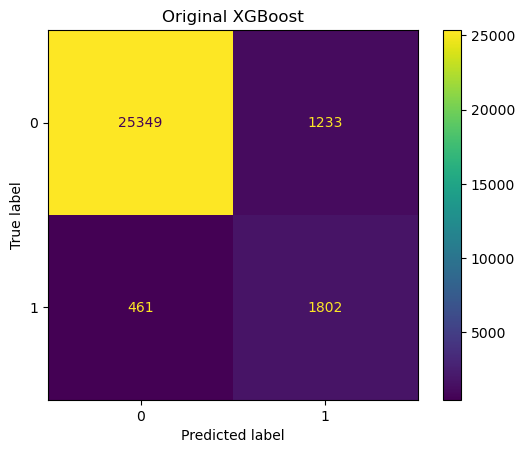

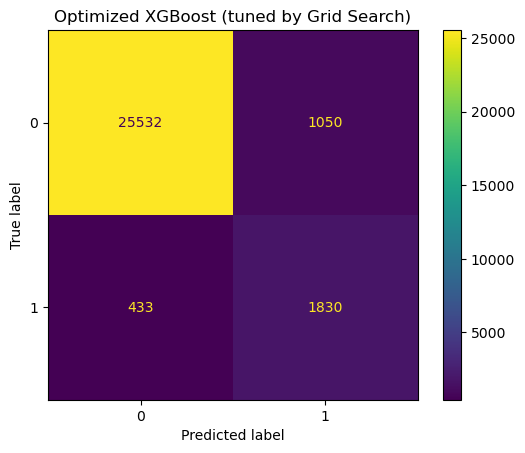

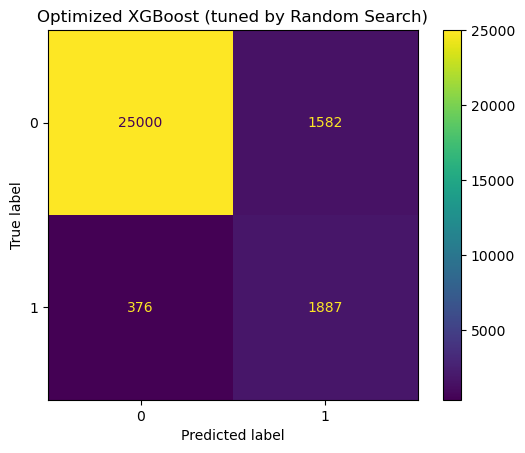

In [149]:
cm0_display = metrics.ConfusionMatrixDisplay(cm0).plot()
cm0_display.ax_.set_title('Original XGBoost')
cm1_display = metrics.ConfusionMatrixDisplay(cm1).plot()
cm1_display.ax_.set_title('Optimized XGBoost (tuned by Grid Search)')
cm2_display = metrics.ConfusionMatrixDisplay(cm2).plot()
cm2_display.ax_.set_title('Optimized XGBoost (tuned by Random Search)')

#### Precision-Recall Area Under Curve 

In [96]:
from sklearn.metrics import plot_precision_recall_curve

Text(0.5, 1.0, 'Optimized XGBoost (tuned by Random Search)')

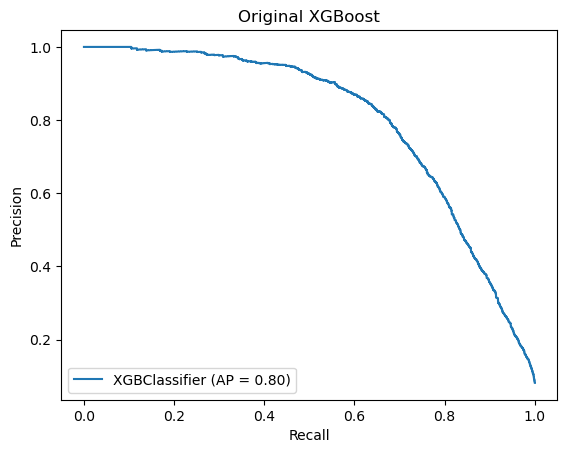

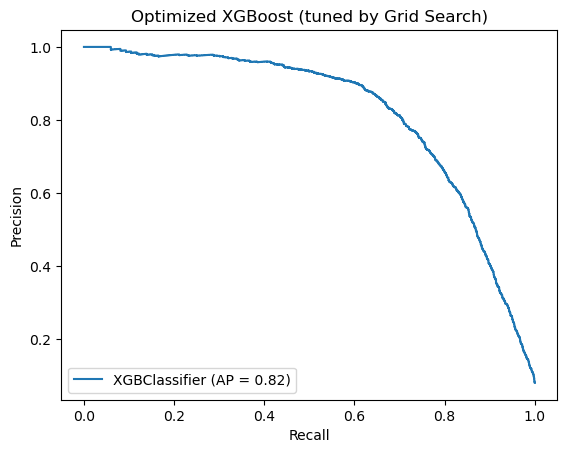

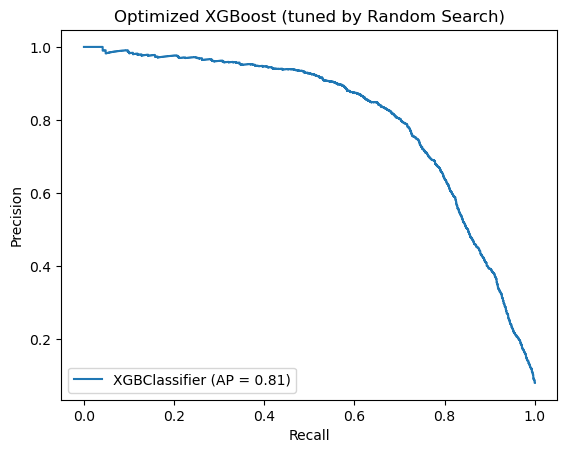

In [151]:
disp0 = plot_precision_recall_curve(XG, X_test_std, y_test)
disp0.ax_.set_title('Original XGBoost')
disp1 = plot_precision_recall_curve(XG3, X_test_std, y_test)
disp1.ax_.set_title('Optimized XGBoost (tuned by Grid Search)')
disp2 = plot_precision_recall_curve(XG4, X_test_std, y_test)
disp2.ax_.set_title('Optimized XGBoost (tuned by Random Search)')

## 5. Takeway
Impact to business:
- Machine learning models can provide high accuracy fraud detection, especially by using the XGBoost algorithm.
- High precision leads to high fraud detection rate.
- High recall improves the user experience.

Implication for future data challenge practice:
- Model optimization and data normalization can noticeably improve the prediction results.
- Due to the limit of computation power, cross-validation and additional fine tuning are not carried out.

### References  
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html  
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets  
https://www.kaggle.com/pavansanagapati/anomaly-detection-credit-card-fraud-analysis  
https://www.kaggle.com/shahules/tackling-class-imbalance  
https://scikit-learn.org/   
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

Image source  
https://images.unsplash.com/photo-1563013544-824ae1b704d3